# Page Replacement Algorithms Comparison
<hr>

- Arthur Oliveira | RA: 156297
- Gabriel Augusto | RA: 148179
- Manoel Serafim  | RA: 156707
- Matheus Silva   | RA: 140317

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Definindo as colunas do DataFrame
colunas = ['Clock_10SD', 'LFU_10SD', 'Aging_10SD', 'Clock_20SD', 'LFU_20SD',
           'Aging_20SD', 'Clock_30SD', 'LFU_30SD', 'Aging_30SD', 'Clock_40SD',
           'LFU_40SD', 'Aging_40SD', 'Clock_50SD', 'LFU_50SD', 'Aging_50SD']

# Criando o DataFrame com colunas vazias
df = pd.DataFrame(columns=colunas)


# Adicionando dados às colunas do DataFrame
for i, coluna in enumerate(colunas):
    # Cria um array com o tamanho 10 e preenche com o número da coluna + 1
    with open('results/' + coluna + '.txt', 'r') as arquivo:
      dados =  [int(linha.strip()) for linha in arquivo]

    df[coluna] = dados

In [9]:
df.head()

,Clock_10SD,LFU_10SD,Aging_10SD,Clock_20SD,LFU_20SD,Aging_20SD,Clock_30SD,LFU_30SD,Aging_30SD,Clock_40SD,LFU_40SD,Aging_40SD,Clock_50SD,LFU_50SD,Aging_50SD
0,6895,11537,6768,9344,12595,9296,10285,12566,10246,10555,12319,11138,11017,12468,12466
1,7171,12490,7132,9235,12471,9350,10253,12541,10221,10758,12617,11215,11060,12470,12553
2,7197,12454,7187,9166,12391,9160,9767,11773,9744,10733,12556,11311,11186,12640,12510
3,7124,12568,7146,9213,12382,9310,10265,12550,10175,10751,12569,11307,11105,12558,12390
4,7154,12506,7154,9239,12447,9306,10293,12545,10281,10649,12486,11272,7659,8298,8825


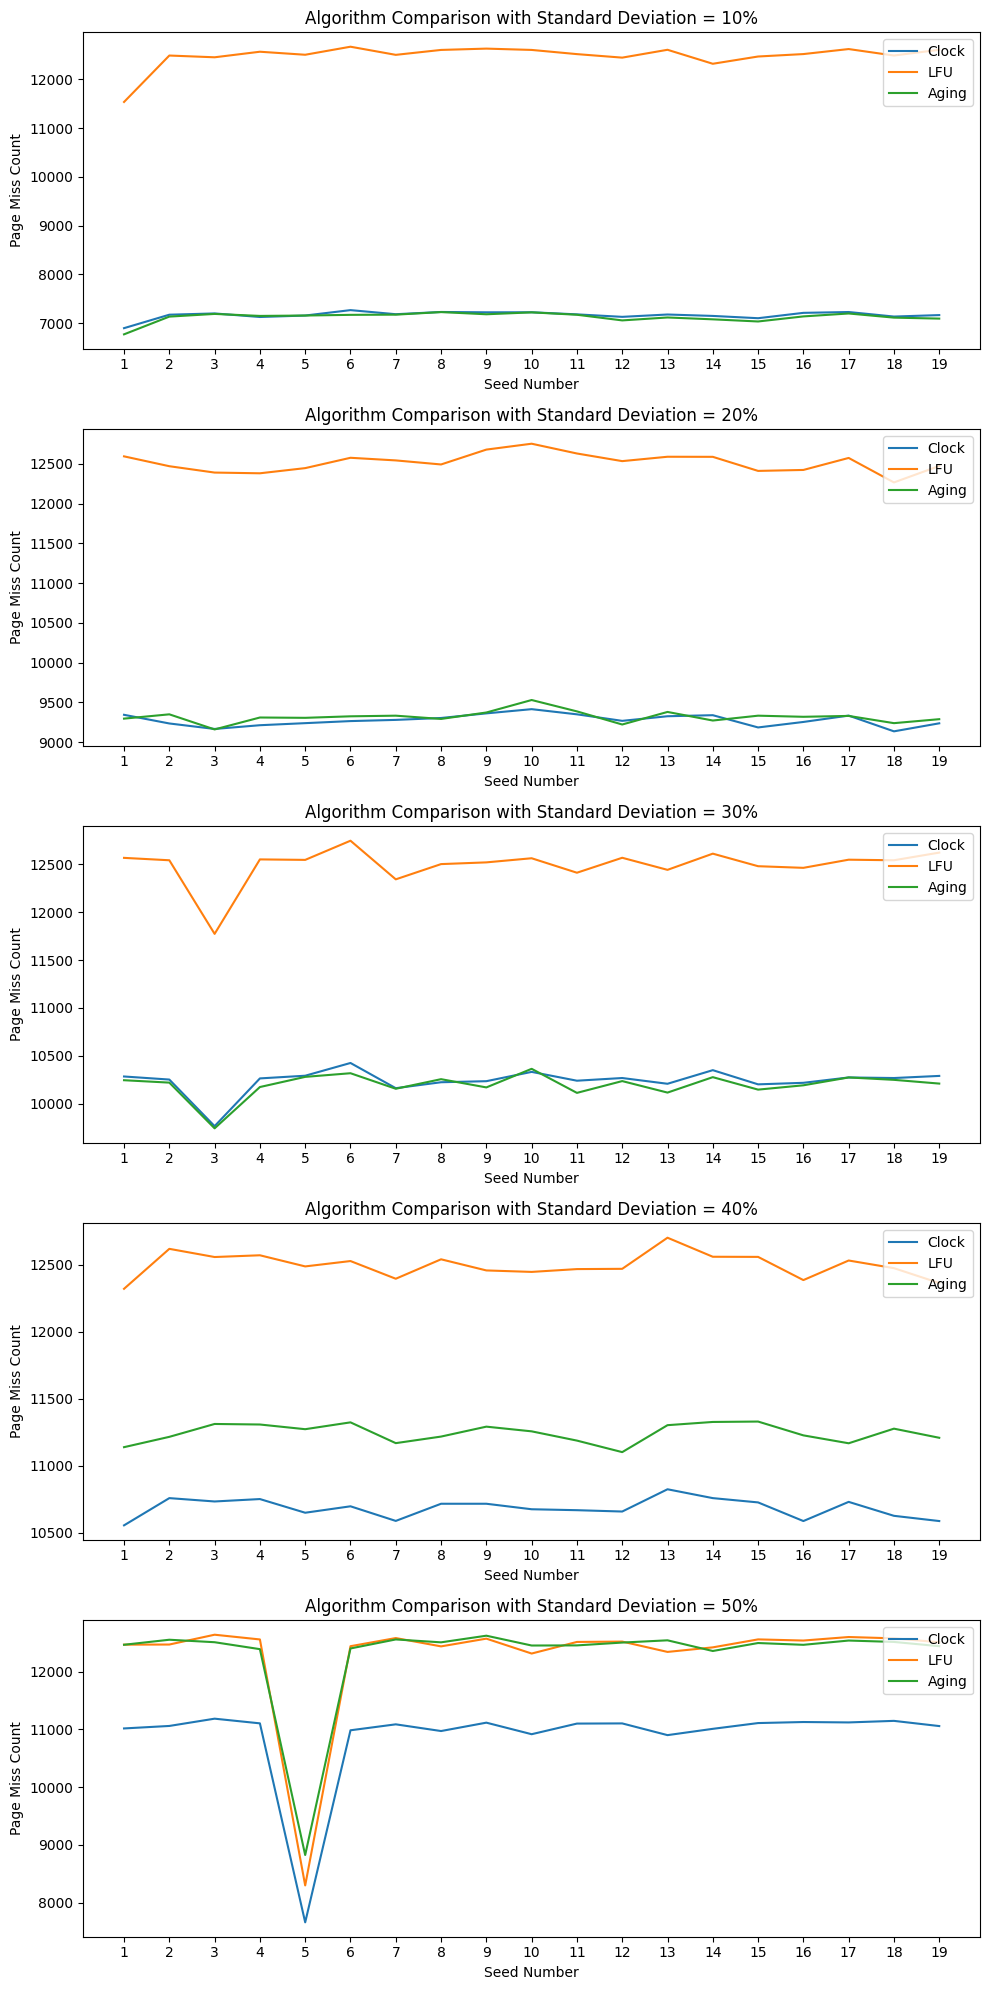

In [10]:
fig, axs = plt.subplots(5, figsize=(10,20))

# Rotulando os gráficos
titulos = ['10%', '20%', '30%', '40%', '50%']

for i in range(5):
    # Selecionando as colunas para cada gráfico
    colunas_do_grafico = df.columns[i*3:(i+1)*3]

    # Plotando os dados
    for coluna in colunas_do_grafico:
        axs[i].plot(df[coluna], label=coluna.split('_')[0])

    # Adicionando título e legenda
    axs[i].set_title('Algorithm Comparison with Standard Deviation = ' + titulos[i])
    axs[i].set_ylabel('Page Miss Count')
    axs[i].set_xlabel('Seed Number')
    axs[i].legend(loc='upper right')

    # Configurando o eixo x
    xticks = np.arange(len(df))
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(xticks + 1)

# Ajustando o layout
plt.tight_layout()
plt.savefig('img/comparison.jpg')
plt.show()